In [13]:
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)


def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    return w

def calc_energy(pattern, w):
    dim = pattern.size
    energy=0
    
    enrg = np.multiply(w, np.multiply.outer(pattern, pattern.T)).sum()
    
    """for i in range(dim):
        for j in range(dim):
            energy-= w[i][j]*pattern[i]*pattern[j]
       """   
    return -enrg



def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    out = np.zeros(dim)
    while True:
        
        for i in range(dim):
            s = 0
            for j in range(dim):
                s += w[i][j]*pattern[j]
                

            if s >= 0:
                sign=1
            else:
                sign=-1
                    
            out[i]=sign
        
        count += 1
            
        energyLevels.append(calc_energy(out,w))
        
        pattern = out
        
        #print("Energy: ", calc_energy(pattern,w))

        if check_True(pattern):
            print ("Number of iterations",count)
            plt.imshow(out.reshape(32,32),interpolation="nearest")
            plt.show()
            break
            
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum in iteration:",count)
            break
        
        
        previousPattern=pattern
        if count ==50:
            break
    
    plt.plot(range(len(energyLevels)),energyLevels)
    plt.show()
    print(energyLevels)

def check_True(predicted_pattern):
    solved = False
    for i in range(patterns.shape[0]):
        if np.array_equal(patterns[i],predicted_pattern):
            print("It matches pattern:",i)
            solved = True
    return solved
        
print(data[0:3,:])

[[-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 [ 1  1  1 ...,  1  1  1]]


It matches pattern: 0
Number of iterations 1


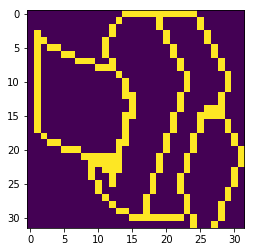

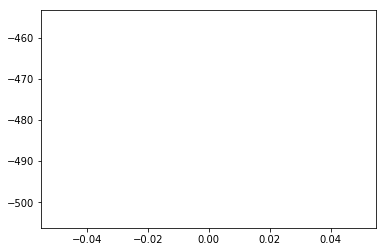

[-479.79687499999983]


In [7]:
w = init_weights(data[0:3,:])
patterns = data[0:3,:]
recall(data[0],w)


[-1 -1 -1 ..., -1 -1 -1]


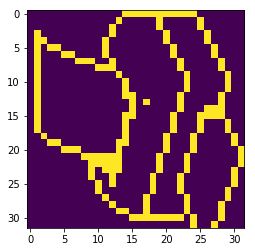

It matches pattern: 0
1024 iterations


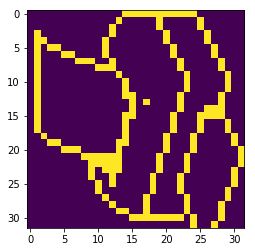

In [8]:
def random_recall(pattern,w):
    dim = pattern.size
    count = 0
    previousPattern = np.zeros(dim)
    out = np.ones(dim)
    
    while True: 
        i = np.random.randint(0,dim)
        for j in range(dim):
            s = 0 
            s += w[i][j]*pattern[j]
            count += 1

        if s >= 0:
            sign=1
        else:
            sign=-1
                    
        out[i]=sign
            
        if (count%1000) == 0:
            print("Energy: ",calc_energy(out))
            plt.imshow(out.reshape(32,32),interpolation="nearest")
            plt.show()
        
        
        pattern[i] = out[i]
        print(pattern)
        
        plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        plt.show()
        
        if check_True(pattern):
            print (count,"iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
        
        previousPattern=pattern
        
        
        
        
patterns = data[0:3,:] #Decide on what patterns you want to match against    
random_recall(data[0],w)

In [9]:
print(calc_energy(data[0]))
print(calc_energy(data[1]))
print(calc_energy(data[2]))
print(calc_energy(data[9]))
print(calc_energy(data[10]))

TypeError: calc_energy() missing 1 required positional argument: 'w'

(1024, 1024)


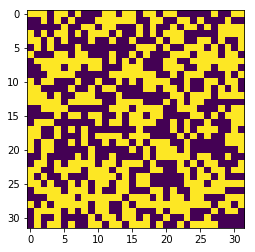

Local minimum in iteration: 2


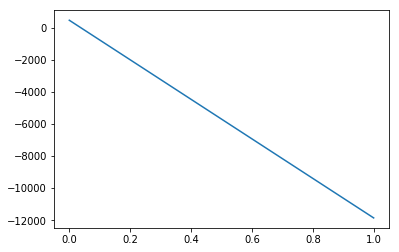

[454.72549592243013, -11855.883811113905]


In [10]:
def genRandWeights(patterns):
    dim1 = patterns.shape[1] #Just to get the size of the weight vector
    
    w = np.random.randn(dim1,dim1)
    print(w.shape)
    return w


def genStartingState(w):
    dim=1024
    out = np.ones(dim)
    for i in range(dim):
        s = 0
        for j in range(dim):
            s += w[i][j]*out[j]

        if s >= 0:
            sign=1
        else:
            sign=-1

        out[i]=sign
    
    plt.imshow(out.reshape(32,32),interpolation="nearest")
    plt.show()
    
    
w = genRandWeights(patterns[0:3,:])
genStartingState(w)
recall(data[0],w)

(1024, 1024)
Local minimum in iteration: 2


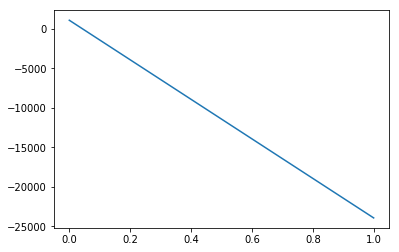

[1092.2300276387998, -23916.880768337818]
Local minimum in iteration: 2


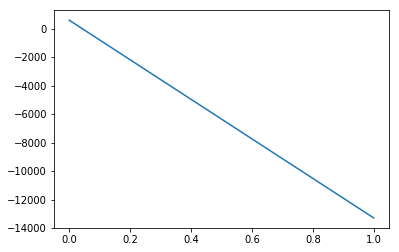

[580.04453401218848, -13292.019533932598]


In [14]:
randW = genRandWeights(patterns[0:3,:])
symW = np.multiply(0.5,np.add(randW,randW.T))
#np.fill_diagonal(symW,0)

recall(data[0],symW)
recall(data[0],randW)
#random_recall(data[0], symW)